In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 33.4 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import pipeline, TFRobertaModel, TFRobertaForMaskedLM, RobertaTokenizer, DataCollatorForLanguageModeling

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,The role of intermediaries in low carbon trans...,The literature on socio-technical transitions ...,"[BUSI, ENER, ENGI, ENVI]","[District heating, Empowering processes, Energ...","[1408, 2105, 2209, 2300]",[The challenge of mitigating climate change ha...,[A decision theatre explores actor interaction...
1,The application of reasoning to aerospace Inte...,This paper aims to discuss the importance and ...,[ENGI],"[Aerospace, Artificial intelligence, Condition...","[2202, 2210, 2211]",[A study in 2018 by International Air Transpor...,[]
2,Relationships and responses: Policing anti-soc...,"Rural policing, with a few notable exceptions,...",[SOCI],"[Anti-social behaviour, Community, Discretion,...","[3303, 3305, 3312]",[Rural studies and geography more broadly have...,[The response of rural police officers to anti...
3,Review of the southern African Moraea ciliata ...,The Moraea ciliata complex (Moraea subg. Acaul...,[AGRI],"[Conservation, New species, South Africa, Subs...",[1110],"[The Afro-Eurasian genus Moraea L., with some ...",[We examine patterns of morphological variatio...
4,Evaluating decentralized energy investments: S...,Today solar power is still dominantly presente...,[ENER],"[Adoption rate, PV, Property, Solar, Spatial v...",[2105],[The cost of on-site solar photovoltaic (PV) e...,[]


Step: 2 Handle class Imbalance with the followin mapping instead of dropping


1. Health, Dent, Nurs, Vent —> Medicine

2. Econ, Arts, Busi, Deci --> Soci

3. Math —> Mult

In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


Step 3: Data Pre-processing

In [ ]:
def prepare_elsevier_data(train_df, val_df, test_df):
    """
    Prepares the Elsevier corpus splits for multi-label classification without splitting.

    Args:
    - train_df: DataFrame containing the training dataset with columns 'abstract' and 'subjareas'.
    - val_df: DataFrame containing the validation dataset with columns 'abstract' and 'subjareas'.
    - test_df: DataFrame containing the test dataset with columns 'abstract' and 'subjareas'.

    Returns:
    - train_texts, val_texts, test_texts: Lists containing texts for training, validation, and testing.
    - train_labels, val_labels, test_labels: Arrays containing encoded labels for training, validation, and testing.
    - target_names: List of unique labels (subject areas).
    """
    mlb = MultiLabelBinarizer()

    all_labels = pd.concat([train_df['subjareas'], val_df['subjareas'], test_df['subjareas']])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df['subjareas'])
    val_labels = mlb.transform(val_df['subjareas'])
    test_labels = mlb.transform(test_df['subjareas'])

    train_texts = train_df['abstract'].tolist()
    val_texts = val_df['abstract'].tolist()
    test_texts = test_df['abstract'].tolist()

    return train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, mlb.classes_

train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)

In [ ]:
print(train_labels[:2])
print(train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
['The literature on socio-technical transitions considers how technological innovations can be established within the context of an incumbent regime that is often resistant or inflexible to change. Strategic niche management is an approach to catalysing a transition to a new regime using protected ‘niche’ spaces to enable development and experimentation with an innovation. Intermediary actors play an important role in establishing these niches as they facilitate knowledge sharing and build the wider networks and systems needed to support an innovation. The influence of intermediaries within socio-technical transitions and strategic niche management is still an under-researched area. In this paper, we use a decision theatre research process to collect empirical evidence from a range of local stakeholders involved in establishing new district heating projects in the United Kingdom (UK). This method, carried ou

In [ ]:
print(len(train_texts))
print(len(val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)


step 4: Classification with fine tuned RoBerta Model

In [ ]:
model_checkpoint = 'roberta-base'

roberta_tokenizer = RobertaTokenizer.from_pretrained(model_checkpoint)
roberta_model = TFRobertaModel.from_pretrained(model_checkpoint)
roberta_mlm = TFRobertaForMaskedLM.from_pretrained(model_checkpoint)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

step 3: Set maximum dimension length based on the data

In [ ]:
max_length = 300

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
train_encodings = roberta_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = roberta_tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = roberta_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')


Step 5: Fine tuning RoBerta model

In [ ]:
def build_finetune_roberta(pretrained_LLM, num_classes=18, max_length=300, hidden_size=[1024], dropout=0.1, learning_rate=0.00005):

    tf.keras.backend.clear_session()
    pretrained_LLM = TFRobertaModel.from_pretrained(pretrained_LLM)
    pretrained_LLM.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    llm_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

    llm_out = pretrained_LLM(llm_inputs)
    output_token = llm_out.last_hidden_state
    hidden = tf.math.reduce_mean(output_token, axis=1)

    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[output_classification])
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
roberta_model = build_finetune_roberta(pretrained_LLM='roberta-base',
                                                 num_classes=num_subject_areas,
                                                 max_length=max_length)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
roberta_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 300)]                0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['attention_mask[0][0]',      
 aModel)                     ngAndCrossAttentions(last_   32         'input_ids[0][0]']           
                             hidden_state=(None, 300, 7                                       

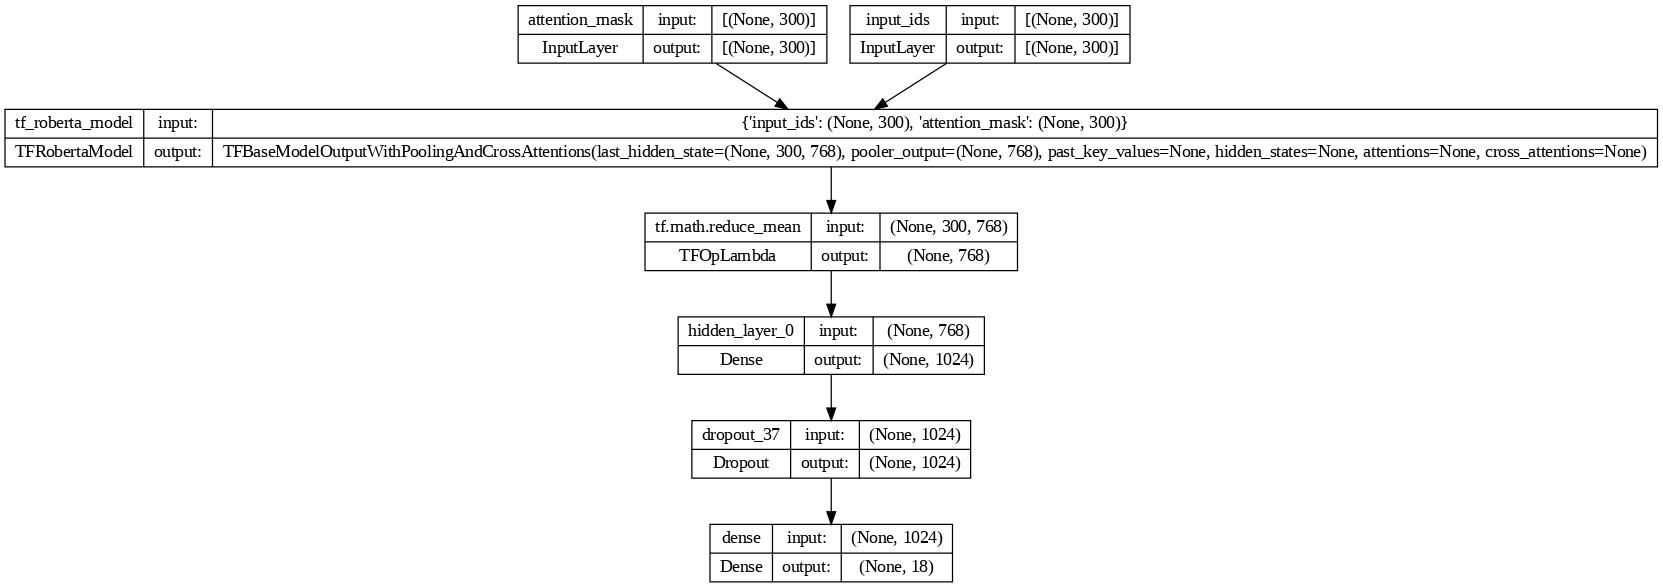

In [ ]:
keras.utils.plot_model(roberta_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
pooler_bert_model_history = roberta_model.fit([train_encodings.input_ids, train_encodings.attention_mask],
                                                  train_labels,
                                                  validation_data=([valid_encodings.input_ids, valid_encodings.attention_mask],
                                                  npvalid_labels),
                                                  batch_size=8,
                                                  epochs=2)

Epoch 1/2


4009/4009 [==============================] - 2552s 627ms/step - loss: 0.1794 - accuracy: 0.4819 - val_loss: 0.1500 - val_accuracy: 0.5440
Epoch 2/2
4009/4009 [==============================] - 2513s 627ms/step - loss: 0.1499 - accuracy: 0.5456 - val_loss: 0.1484 - val_accuracy: 0.5483


Validation Data Set Evaluation

In [ ]:
val_score = roberta_model.evaluate([valid_encodings.input_ids, valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 95s 755ms/step - loss: 0.1484 - accuracy: 0.5483
Val loss: 0.14837290346622467
Val accuracy: 0.5482664108276367


In [ ]:
val_predictions = roberta_model.predict([valid_encodings.input_ids, valid_encodings.attention_mask])

126/126 [==============================] - 96s 742ms/step


126/126 [==============================] - 94s 744ms/step
              precision    recall  f1-score   support

        AGRI       0.86      0.46      0.60       452
        BIOC       0.59      0.76      0.67       653
        CENG       0.65      0.20      0.30       167
        CHEM       0.55      0.31      0.39       248
        COMP       0.68      0.23      0.34       179
        EART       0.95      0.47      0.63       243
        ENER       0.67      0.62      0.65       237
        ENGI       0.63      0.54      0.58       412
        ENVI       0.72      0.40      0.52       523
        IMMU       0.64      0.41      0.50       226
        MATE       0.78      0.63      0.70       355
        MEDI       0.76      0.71      0.73       835
        MULT       0.96      0.56      0.71       396
        NEUR       0.86      0.66      0.75       341
        PHAR       0.78      0.13      0.22       240
        PHYS       0.57      0.56      0.56       245
        PSYC       0.47

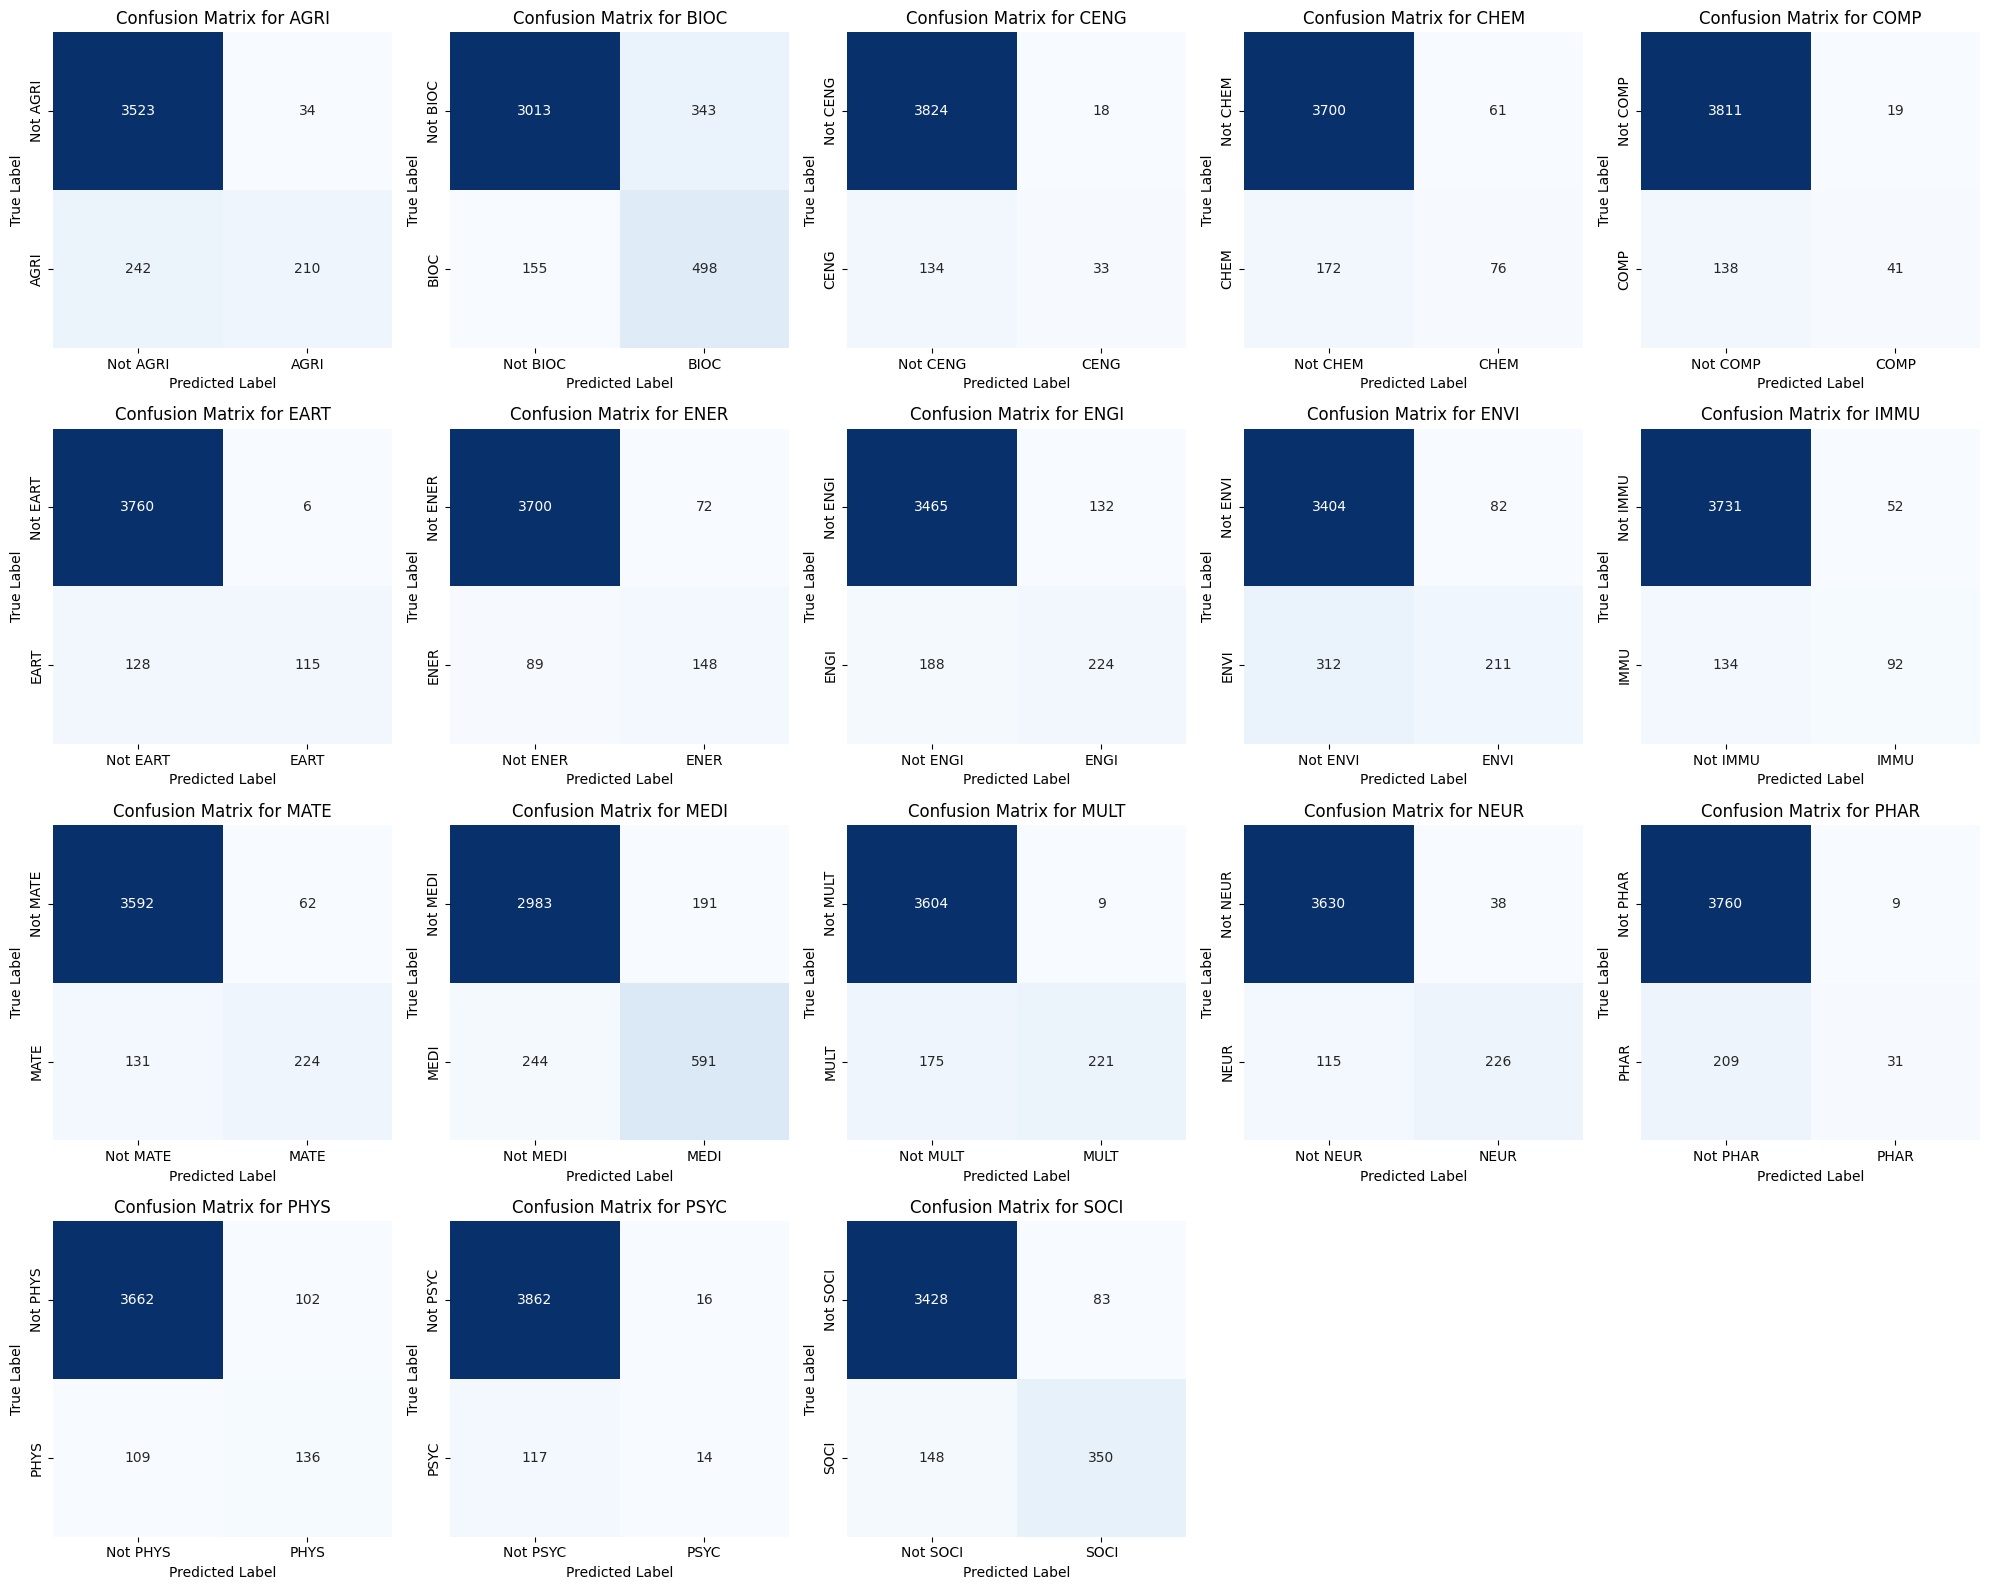

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(roberta_model,
             [valid_encodings.input_ids,valid_encodings.attention_mask],
             val_labels,
             target_names)


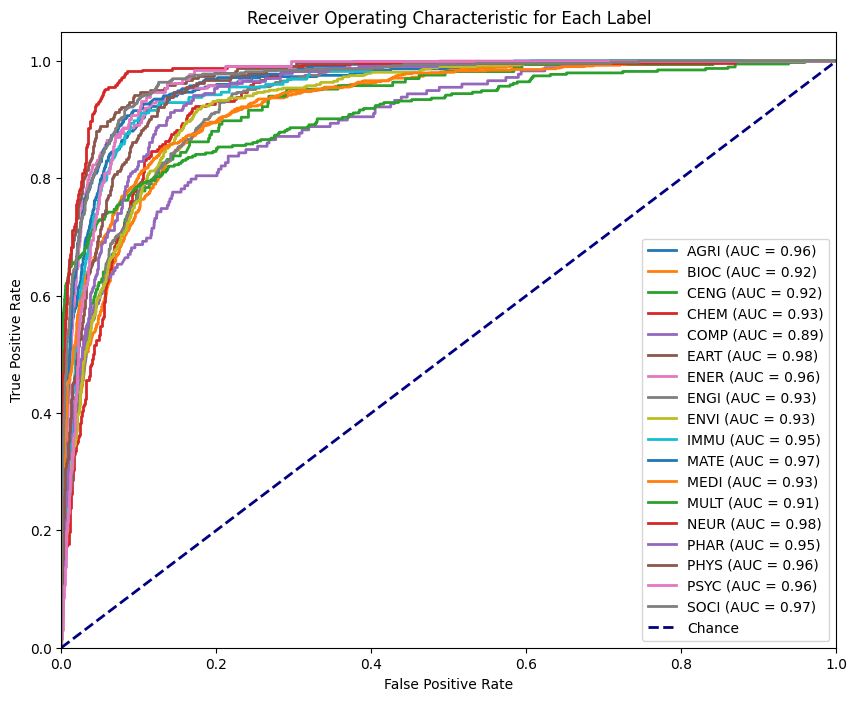

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = roberta_model.evaluate([test_encodings.input_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 95s 754ms/step - loss: 0.1512 - accuracy: 0.5422
Test loss: 0.15117841958999634
Test accuracy: 0.5421656966209412


In [ ]:
test_predictions = roberta_model.predict([test_encodings.input_ids, test_encodings.attention_mask])

126/126 [==============================] - 94s 748ms/step


126/126 [==============================] - 94s 749ms/step
              precision    recall  f1-score   support

        AGRI       0.81      0.46      0.59       410
        BIOC       0.59      0.76      0.66       630
        CENG       0.69      0.16      0.26       191
        CHEM       0.54      0.36      0.44       258
        COMP       0.66      0.25      0.36       148
        EART       0.78      0.47      0.59       219
        ENER       0.66      0.62      0.64       268
        ENGI       0.64      0.54      0.59       425
        ENVI       0.74      0.35      0.47       546
        IMMU       0.68      0.46      0.55       228
        MATE       0.77      0.57      0.66       337
        MEDI       0.75      0.73      0.74       820
        MULT       0.97      0.55      0.71       435
        NEUR       0.81      0.66      0.73       383
        PHAR       0.91      0.16      0.27       244
        PHYS       0.57      0.52      0.54       227
        PSYC       0.62

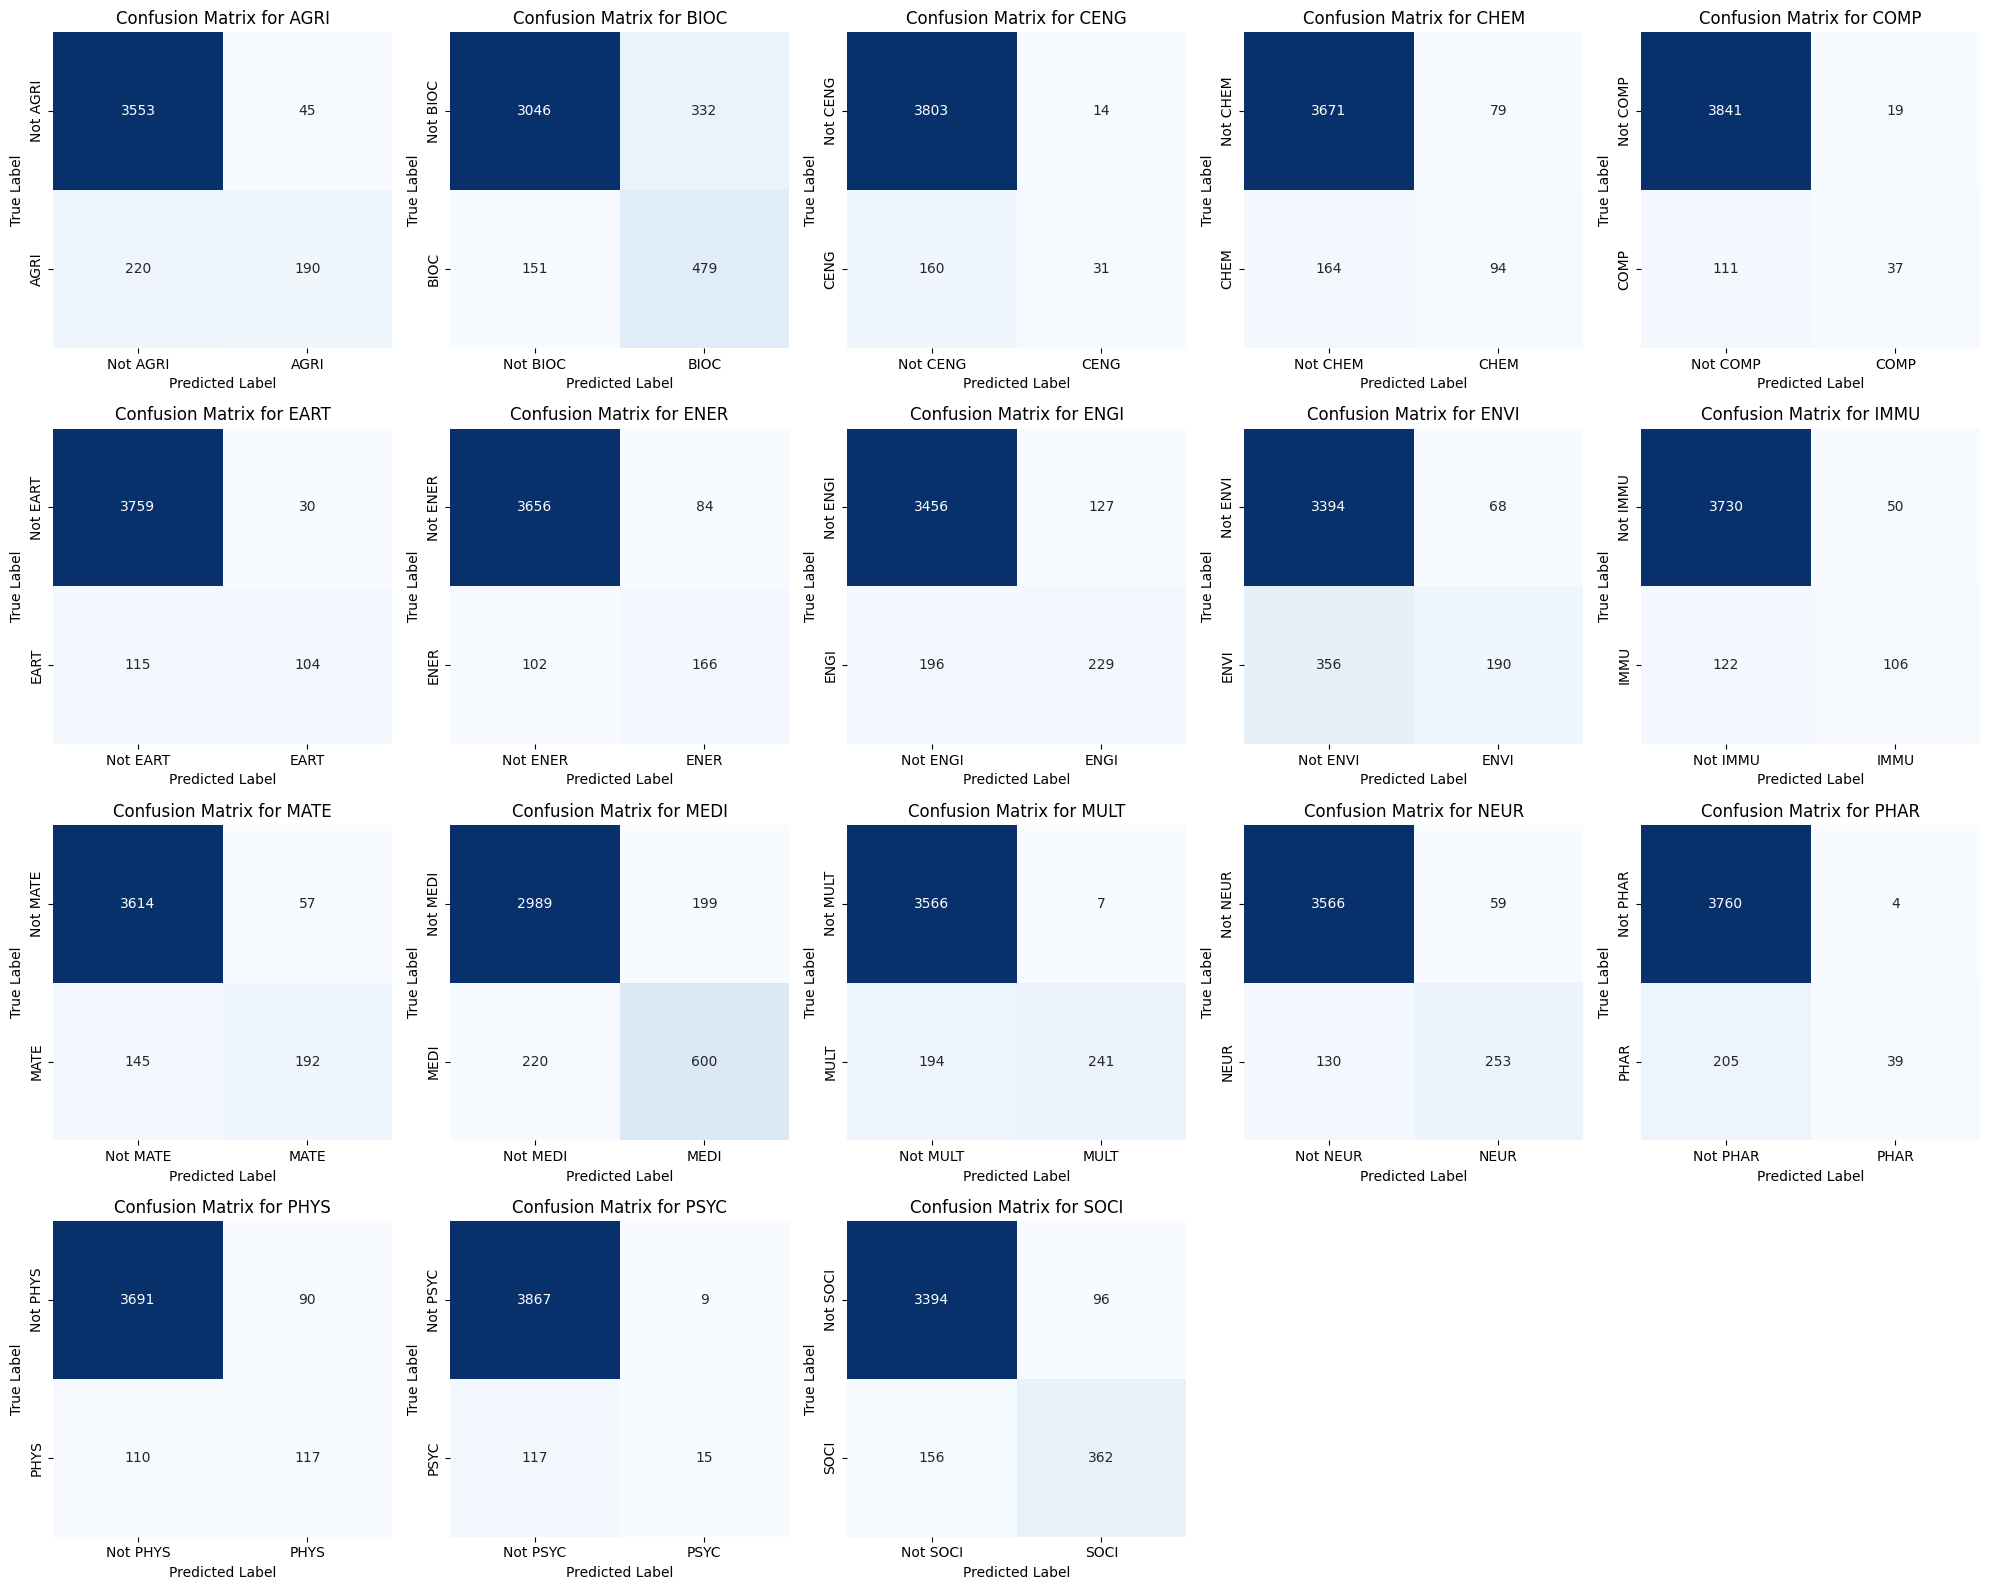

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(roberta_model,
             [test_encodings.input_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


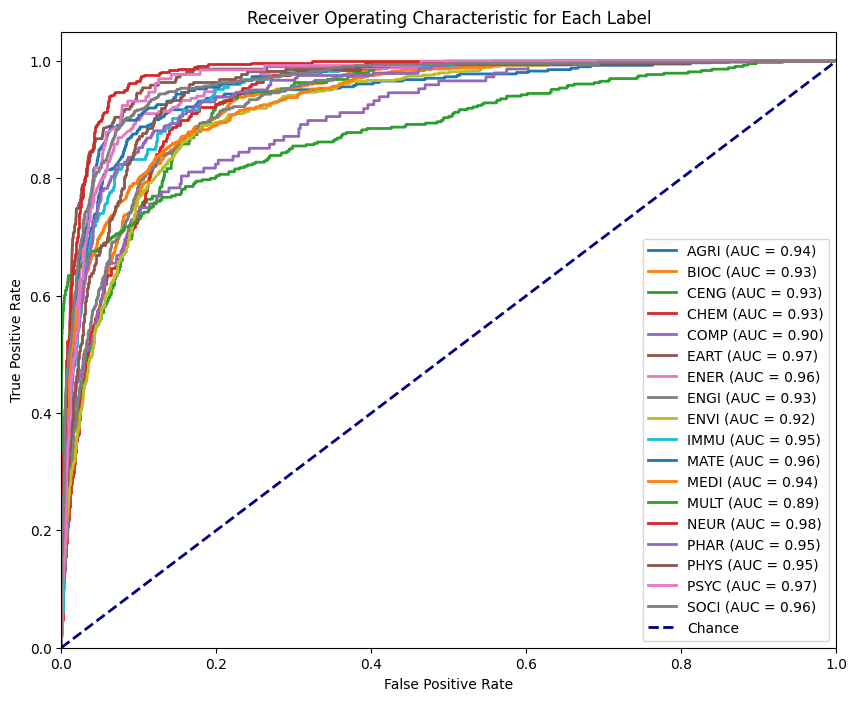

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'roberta_class_balance.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
1,This dataset contains Adult Male Equivalent (A...,[MULT],MULT,MULT,0.996299
2,Voluntary actions are often accompanied by a c...,"[NEUR, PSYC]","NEUR, PSYC",NEUR,0.939027
3,"Non-volant small mammals, which include small-...",[MULT],MULT,MULT,0.928393
4,"The liquid crystal mixture E7, based on cyanob...","[ENGI, MATE, PHYS]","MATE, PHYS",MATE,0.888379
5,Failures of self-regulation in problem and pat...,"[MEDI, NEUR]",NEUR,NEUR,0.953631
...,...,...,...,...,...
4002,Background: Research evidence from studies in ...,[PSYC],PSYC,PSYC,0.877675
4003,A 3D numerical modelling study to investigate ...,[ENGI],EART,EART,0.774785
4004,Background: Mental health inpatient rehabilita...,"[MEDI, NEUR]","MEDI, PSYC",MEDI,0.915514
4006,"Astrocytes, once considered passive support ce...",[BIOC],BIOC,BIOC,0.800193
